In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [2]:
csv_file_path = 'Placement_Data_Full_Class.csv'
df = pd.read_csv(csv_file_path)
#df['salary'] = df['salary'].fillna(0)
print(df.head())
df.shape

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


(215, 15)

In [3]:
df = df.dropna()
# Convert categorical variables to numerical values
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
df['status'] = le.fit_transform(df['status'])

X = df.drop('salary', axis=1)
y = df['salary']

# Convert target variable (salary) into categories
y = pd.cut(y, bins=[0, 100000, 200000, 300000, 400000, np.inf], labels=[0, 1, 2, 3, 4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
import random
random.seed(10)

model1 = MLPRegressor(hidden_layer_sizes=[32,32],activation='identity',solver='lbfgs',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model2 = MLPRegressor(hidden_layer_sizes=[32,32],activation='identity',solver='sgd',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model3 = MLPRegressor(hidden_layer_sizes=[32,32],activation='identity',solver='adam',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model4 = MLPRegressor(hidden_layer_sizes=[32,32],activation='logistic',solver='lbfgs',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model5 = MLPRegressor(hidden_layer_sizes=[32,32],activation='logistic',solver='sgd',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model6 = MLPRegressor(hidden_layer_sizes=[32,32],activation='logistic',solver='adam',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model7 = MLPRegressor(hidden_layer_sizes=[32,32],activation='tanh',solver='lbfgs',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model8 = MLPRegressor(hidden_layer_sizes=[32,32],activation='tanh',solver='sgd',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model9 = MLPRegressor(hidden_layer_sizes=[32,32],activation='tanh',solver='adam',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model10 = MLPRegressor(hidden_layer_sizes=[32,32],activation='relu',solver='lbfgs',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model11 = MLPRegressor(hidden_layer_sizes=[32,32],activation='relu',solver='sgd',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
model12 = MLPRegressor(hidden_layer_sizes=[32,32],activation='relu',solver='adam',tol=10**(-6),max_iter=1000,n_iter_no_change=50)

regr1 = model1.fit(X_train, y_train)
regr2 = model2.fit(X_train, y_train)
regr3 = model3.fit(X_train, y_train)
regr4 = model4.fit(X_train, y_train)
regr5 = model5.fit(X_train, y_train)
regr6 = model6.fit(X_train, y_train)
regr7 = model7.fit(X_train, y_train)
regr8 = model8.fit(X_train, y_train)
regr9 = model9.fit(X_train, y_train)
regr10 = model10.fit(X_train, y_train)
regr11 = model11.fit(X_train, y_train)
regr12 = model12.fit(X_train, y_train)


c:\Users\uriso\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\uriso\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\uriso\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\uriso\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stoch

In [36]:
y_pred1 =model1.predict(X_test)
y_pred1 = np.clip(np.round(y_pred1).astype(int), 0, 4)
accuracy1 = accuracy_score(y_test, y_pred1)

y_pred2 =model2.predict(X_test)
y_pred2 = np.clip(np.round(y_pred2).astype(int), 0, 4)
accuracy2 = accuracy_score(y_test, y_pred2)

y_pred3 =model3.predict(X_test)
y_pred3 = np.clip(np.round(y_pred3).astype(int), 0, 4)
accuracy3 = accuracy_score(y_test, y_pred3)

y_pred4 =model4.predict(X_test)
y_pred4 = np.clip(np.round(y_pred4).astype(int), 0, 4)
accuracy4 = accuracy_score(y_test, y_pred4)

y_pred5 =model5.predict(X_test)
y_pred5 = np.clip(np.round(y_pred5).astype(int), 0, 4)
accuracy5 = accuracy_score(y_test, y_pred5)

y_pred6 =model6.predict(X_test)
y_pred6 = np.clip(np.round(y_pred6).astype(int), 0, 4)
accuracy6 = accuracy_score(y_test, y_pred6)

y_pred7 =model7.predict(X_test)
y_pred7 = np.clip(np.round(y_pred7).astype(int), 0, 4)
accuracy7 = accuracy_score(y_test, y_pred7)

y_pred8 =model8.predict(X_test)
y_pred8 = np.clip(np.round(y_pred8).astype(int), 0, 4)
accuracy8 = accuracy_score(y_test, y_pred8)

y_pred9 =model9.predict(X_test)
y_pred9 = np.clip(np.round(y_pred9).astype(int), 0, 4)
accuracy9 = accuracy_score(y_test, y_pred9)


y_pred10 =model10.predict(X_test)
y_pred10 = np.clip(np.round(y_pred10).astype(int), 0, 4)
accuracy10 = accuracy_score(y_test, y_pred10)

y_pred11 =model11.predict(X_test)
y_pred11 = np.clip(np.round(y_pred11).astype(int), 0, 4)
accuracy11 = accuracy_score(y_test, y_pred11)

y_pred12 =model12.predict(X_test)
y_pred12 = np.clip(np.round(y_pred12).astype(int), 0, 4)
accuracy12 = accuracy_score(y_test, y_pred12)

data = {'Activation Function\solver': ['identity', 'logistic', 'tanh', 'relu'],
        'lbfgs': [accuracy1,accuracy4, accuracy7, accuracy10],
        'sgd': [accuracy2, accuracy5, accuracy8, accuracy11],
        'adam': [accuracy3, accuracy6, accuracy9, accuracy12]}

dff = pd.DataFrame(data)
dff.set_index('Activation Function\solver', inplace=True)
print(dff)

                               lbfgs       sgd      adam
Activation Function\solver                              
identity                    0.756757  0.756757  0.756757
logistic                    0.540541  0.756757  0.702703
tanh                        0.540541  0.540541  0.405405
relu                        0.432432  0.675676  0.459459


### Method

We explore various combinations of activation functions and solvers in MLPRegressor to predict salary categories from a given dataset. First preprocess the dataset by removing missing values, encoding categorical features, and scaling the data. The target variable salary is then divided into five different bins (0-100000, 100000-200000, 200000-300000, 30000-400000, 400000-infinty). After splitting the dataset into training and testing sets, MLPRegressor models were trained using different combinations of activation functions (identity, logistic, tanh, and relu) and solvers (lbfgs, sgd, and adam). Predictions for each combination are then made on the test set and rounded to the nearest integer. The accuracy of each combination is calculated by comparing the predicted salary category with the actual salary category in the test set.

### Conclusion

From the results it is evident that the combination of activation='identity' and the solvers 'lbfgs', 'sgd' and 'adam' produces the highest accuracy of 0.7567567567567568. This shows that the "identity" activation function using any of the three solvers performs better at predicting salary categories based on a given dataset. On the other hand, the combination of activation='tanh' and solver='adam' resulted in the lowest accuracy of 0.40540540540540543, indicating that it may not be suitable for this dataset or for predicting salary categories. Overall, the code provides insight into how different activation functions and solvers affect the performance of an MLPRegressor model on a given dataset, which can help us determine the best combination for predicting salary categories.

### Visualize fitting history

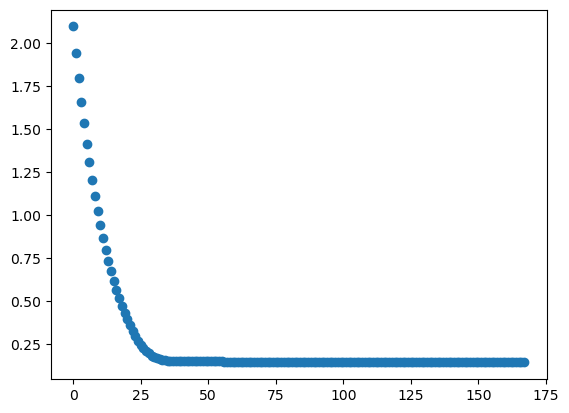

In [39]:
# print(regr.validation_scores_)
fig, ax = plt.subplots()
# training log-loss
ax.plot(regr3.loss_curve_,"o")
plt.show()

The accuracy of this model is around 75%. The model uses activation='identity', the hyperbolic tan function, solver='adam' stochastic gradient descent. This figure shows the loss curve of "MLPRegressor" during training. The loss curve represents the error between the model prediction and the true target value as a function of iterations. The model stabilizes after about 25 iterations.